In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06
mean,4.389256e+05,4.173928e+17,6.997209e+01,4.881581e+04,3.853679e+01,-9.022801e+01,8.876822e+04,1.357297e+09,3.853670e+01,-9.022818e+01,5.080740e-03
std,2.873162e+05,1.309166e+18,1.588492e+02,2.688324e+04,5.071484e+00,1.374584e+01,3.017287e+05,1.915894e+07,5.105903e+00,1.375782e+01,7.109802e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.005362e+05,1.800430e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.430000e+02,1.341132e+09,3.473845e+01,-9.690064e+01,0.000000e+00
50%,4.010730e+05,3.520550e+15,4.739000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.354658e+09,3.936759e+01,-8.744167e+01,0.000000e+00
75%,6.475008e+05,4.642260e+15,8.304000e+01,7.204200e+04,4.189480e+01,-8.015800e+01,2.032800e+04,1.376492e+09,4.195535e+01,-8.024331e+01,0.000000e+00
max,1.048574e+06,4.992350e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [13]:
print(train.shape)
print(test.shape)

(1048575, 23)
(555719, 23)


In [15]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,01-01-2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,01-01-2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.604294e+06  1.604294e+06  1.604294e+06  1.604294e+06  1.604294e+06   
mean   4.389256e+05  4.173928e+17  6.997209e+01  4.881581e+04  3.853679e+01   
std    2.873162e+05  1.309166e+18  1.588492e+02  2.688324e+04  5.071484e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.005362e+05  1.800430e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.010730e+05  3.520550e+15  4.739000e+01  4.817400e+04  3.935430e+01   
75%    6.475008e+05  4.642260e+15  8.304000e+01  7.204200e+04  4.189480e+01   
max    1.048574e+06  4.992350e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.604294e+06  1.604294e+06  1.604294e+06  1.604294e+06  1.604294e+06   
mean  -9.022801e+01  8.876822e+04  1.357297e+09  3.853670e+01 -9.022818e+01   
std    1.374584e+01  3.017287e+05  1.915894e+07  5.

In [17]:
test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time        cc_num  \
0                0      21-06-2020 12:14  2.291160e+15   
1                1      21-06-2020 12:14  3.573030e+15   
2                2      21-06-2020 12:14  3.598220e+15   
3                3      21-06-2020 12:15  3.591920e+15   
4                4      21-06-2020 12:15  3.526830e+15   
...            ...                   ...           ...   
555714      555714      31-12-2020 23:59  3.056060e+13   
555715      555715      31-12-2020 23:59  3.556610e+15   
555716      555716      31-12-2020 23:59  6.011720e+15   
555717      555717      31-12-2020 23:59  4.079770e+12   
555718      555718      31-12-2020 23:59  4.170690e+15   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Ni

In [19]:
train.info

<bound method DataFrame.info of          Unnamed: 0 trans_date_trans_time        cc_num  \
0                 0      01-01-2019 00:00  2.703190e+15   
1                 1      01-01-2019 00:00  6.304230e+11   
2                 2      01-01-2019 00:00  3.885950e+13   
3                 3      01-01-2019 00:01  3.534090e+15   
4                 4      01-01-2019 00:03  3.755340e+14   
...             ...                   ...           ...   
1048570     1048570      10-03-2020 16:07  6.011980e+15   
1048571     1048571      10-03-2020 16:07  4.839040e+15   
1048572     1048572      10-03-2020 16:08  5.718440e+11   
1048573     1048573      10-03-2020 16:08  4.646850e+18   
1048574     1048574      10-03-2020 16:08  2.283740e+15   

                                   merchant        category     amt  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23   
2                      fraud_Lind-Buckridge   

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state','job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

train[col] = le.fit_transform(train[col])
label_encoders[col] = le

test[col] = le.fit_transform(test[col])
label_encoders[col] = le

In [33]:
print(train.shape)
print(test.shape)
print(data.shape)

(1048575, 23)
(555719, 23)
(1604294, 23)


In [35]:
print(data.head(0))
print(data.head())
print(data.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]
   Unnamed: 0 trans_date_trans_time        cc_num  merchant  category     amt  \
0           0      01-01-2019 00:00  2.703190e+15       514         8    4.97   
1           1      01-01-2019 00:00  6.304230e+11       241         4  107.23   
2           2      01-01-2019 00:00  3.885950e+13       390         0  220.11   
3           3      01-01-2019 00:01  3.534090e+15       360         2   45.00   
4           4      01-01-2019 00:03  3.755340e+14       297         9   41.96   

       first     last  gender                        street  ...      lat  \
0   Jennifer    Banks       0                561 Perry Cove  ...  36.0788   
1  Stephanie     Gill       0  43039 Riley Greens Suite 393  ...  48.8878   
2     Edward  Sanchez 

Text(0.5, 1.0, 'Distribution of Fradulent vs Non-Fradulent Transaction')

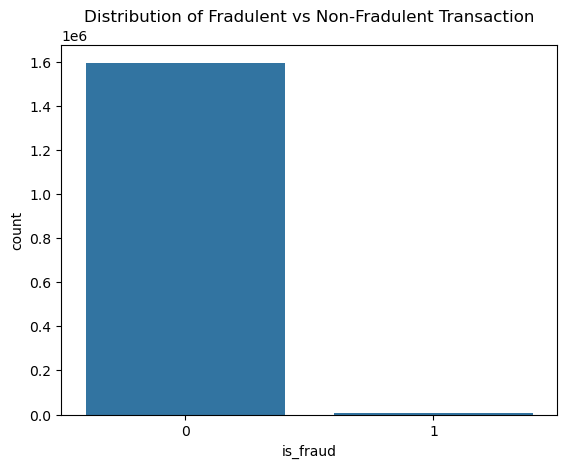

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='is_fraud')
plt.title('Distribution of Fradulent vs Non-Fradulent Transaction')

In [39]:
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())

555719
0


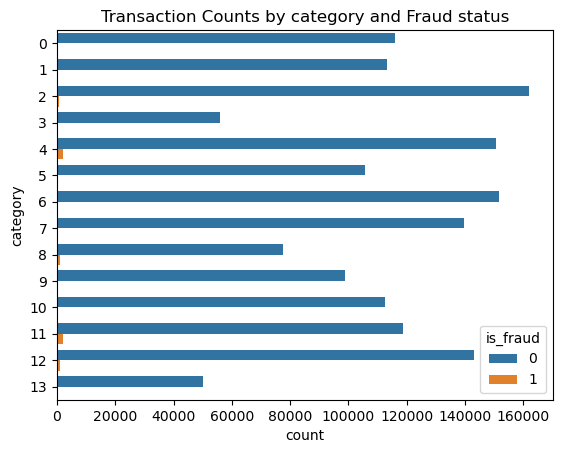

In [41]:
plt.figure(figure=(12, 6))
sns.countplot(data=data, y='category',hue='is_fraud')
plt.title('Transaction Counts by category and Fraud status')
plt.xticks(rotation=0)
plt.show()

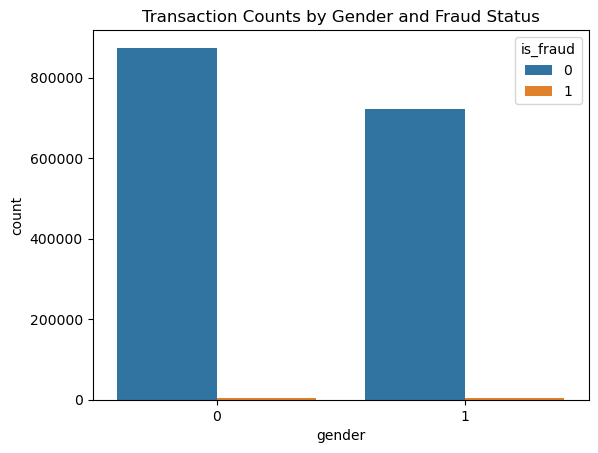

In [43]:
# The 0 represent male and 1 represent female
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: '01-01-2019 00:00'

<Figure size 2000x1000 with 0 Axes>

In [51]:
# Training the model with DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

NameError: name 'X_train' is not defined

In [53]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training the model for logisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
# Training the model with DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
# Training the model with logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))